## Preamble

In [3]:
# !pip install matplotlib

In [5]:
import json

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

import qsharp
qsharp.packages.add("Microsoft.Quantum.MachineLearning::0.15.2101125897")
qsharp.reload()

from Microsoft.Quantum.Samples import (
    TrainHalfMoonModel, ValidateHalfMoonModel, ClassifyHalfMoonModel
)

Preparing Q# environment...
....

Adding package Microsoft.Quantum.MachineLearning::0.15.2101125897.

Reloading workspace.

In [6]:
%matplotlib inline

## Data

In [19]:
with open('constructed_data_screenshots.json') as f:
    data = json.load(f)

In [21]:
data

{'TrainingData': {'Features': [[0.050898849964141846,
    -0.26096662878990173,
    -0.042696475982666016,
    -0.18565554916858673,
    -0.13402746617794037,
    -0.2184571921825409,
    -0.23074579238891602,
    -0.28868627548217773,
    0.03369927406311035,
    0.19882813096046448,
    0.17526042461395264,
    -0.17657892405986786,
    0.44967710971832275,
    0.16613301634788513,
    -0.005614250898361206,
    0.17001080513000488,
    0.1696423441171646,
    -0.1784413754940033,
    -0.6829128265380859,
    -0.043452873826026917,
    -0.32233938574790955,
    -0.25636032223701477,
    -0.7633469104766846,
    0.2878175973892212,
    0.5100064873695374,
    0.004790981765836477,
    0.04034406691789627,
    0.03425370156764984,
    0.27274006605148315,
    -0.5968408584594727,
    0.14653915166854858,
    -0.0635460913181305,
    0.0478624552488327,
    0.12089607119560242,
    0.18324802815914154,
    0.8322830200195312,
    0.13830533623695374,
    0.06468209624290466,
    0.14310

## Training

In [22]:
parameter_starting_points = [
    [0.060057, 3.00522,  2.03083,  0.63527,  1.03771, 1.27881, 4.10186,  5.34396],
    [0.586514, 3.371623, 0.860791, 2.92517,  1.14616, 2.99776, 2.26505,  5.62137],
    [1.69704,  1.13912,  2.3595,   4.037552, 1.63698, 1.27549, 0.328671, 0.302282],
    [5.21662,  6.04363,  0.224184, 1.53913,  1.64524, 4.79508, 1.49742,  1.545]
 ]

In [23]:
(parameters, bias) = TrainHalfMoonModel.simulate(
    trainingVectors=data['TrainingData']['Features'],
    trainingLabels=data['TrainingData']['Labels'],
    initialParameters=parameter_starting_points,
    verbose=True
)

Ready to train.
  Beginning training at start point #0...
    Pre-encoding samples...
    Beginning epoch 1.
        Beginning minibatch 0 of 1.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly committing.
    Beginning epoch 2.
        Beginning minibatch 0 of 7.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 1 of 7.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 2 of 7.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibl

        Beginning minibatch 1 of 3.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 2 of 3.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly committing.
    Beginning epoch 5.
        Beginning minibatch 0 of 2.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 1 of 2.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
            Observed good parameter update... estimating and possibly committing.
    Beginning epoch 6.
        Beginning minibatch 0 o

      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly committing.
  Beginning training at start point #3...
    Pre-encoding samples...
    Beginning epoch 1.
        Beginning minibatch 0 of 1.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
            Observed good parameter update... estimating and possibly committing.
    Beginning epoch 2.
        Beginning minibatch 0 of 7.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 1 of 7.
      Estimating gradient at sample 0...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 2 of 7.
  

## Validation

In [24]:
miss_rate = ValidateHalfMoonModel.simulate(
    validationVectors=data['ValidationData']['Features'],
    validationLabels=data['ValidationData']['Labels'],
    parameters=parameters, bias=bias
)

print(f"Miss rate: {miss_rate:0.2%}")

Miss rate: 50.00%


## Plotting

Classify the validation so that we can plot it.

In [25]:
actual_labels = data['ValidationData']['Labels']
classified_labels = ClassifyHalfMoonModel.simulate(
    samples=data['ValidationData']['Features'],
    parameters=parameters, bias=bias,
    tolerance=0.005, nMeasurements=10_000
)

To plot samples, it's helpful to have colors for each.
We'll plot four cases:
- actually 0, classified as 0
- actually 0, classified as 1
- actually 1, classified as 1
- actually 1, classified as 0


In [26]:
cases = [(0, 0), (0, 1), (1, 1), (1, 0)]

We can use these cases to define markers and colormaps for plotting.

In [27]:
markers = [
    '.' if actual == classified else 'x'
    for (actual, classified) in cases
]

In [28]:
colormap = cmx.ScalarMappable(colors.Normalize(vmin=0, vmax=len(cases) - 1))
colors = [colormap.to_rgba(idx_case) for (idx_case, case) in enumerate(cases)]

It's also really helpful to have the samples as a NumPy array so that we
can find masks for each of the four cases.

In [29]:
samples = np.array(data['ValidationData']['Features'])

Finally, we loop over the cases above and plot the samples that match each.

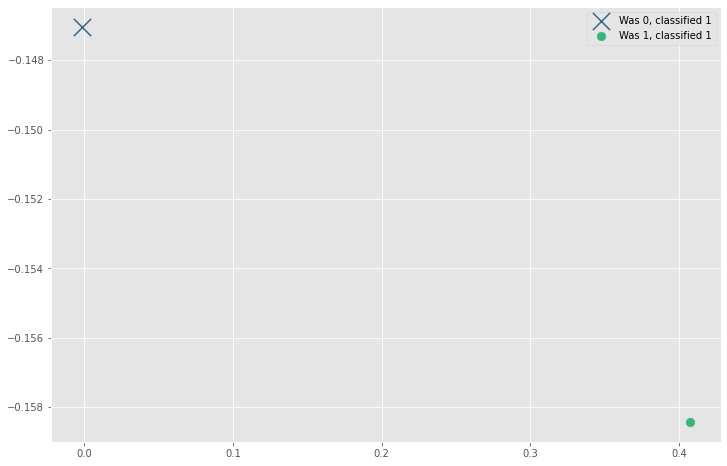

In [30]:
plt.figure(figsize=(12, 8))
for (idx_case, ((actual, classified), marker, color)) in enumerate(zip(cases, markers, colors)):
    mask = np.logical_and(np.equal(actual_labels, actual), np.equal(classified_labels, classified))
    if not np.any(mask): continue
    plt.scatter(
        samples[mask, 0], samples[mask, 1],
        label=f"Was {actual}, classified {classified}",
        marker=marker, s=300, c=[color],
    )
plt.legend()

## Epilogue

In [31]:
qsharp.component_versions()

{'iqsharp': LooseVersion ('0.18.2106148911'),
 'Jupyter Core': LooseVersion ('1.5.0.0'),
 '.NET Runtime': LooseVersion ('.NETCoreApp,Version=v3.1'),
 'qsharp': LooseVersion ('0.18.2106.148911')}